#  <span style="text-align=center; color:DarkMagenta; font-family:Georgia; font-size:1.2em;"> **   _ M1- TP1 Apprentissage Automatique et Numérique_** </span>

# <span style="color:green; font-family:Georgia; font-size:1.5em;">1. Introduction

<span style="color:black; font-family:Georgia; font-size:1.3em;">Les objectifs de ce premier TP sont :</span>

1. <span style="color:blue; font-family:Georgia; font-size:1.2em;">Exploration et Visualisation de données avec la bibliothèque __Pandas__</span>

2. <span style="color:blue; font-family:Georgia; font-size:1.2em;">Implémentation d'une régression Linéaire Multiple avec la méthode de __moindres carrés__</span>

<span style="color:black; font-family:Georgia; font-size:1.3em;">Regression Lineaire : </span>

1. <span style="color:blue; font-family:Georgia; font-size:1.2em;"> Formule : $ y=\sum_{i=1}^N w_i x_i + b  $  </span>

<span style="color:black; font-family:Georgia; font-size:1.3em;">Regression Lineaire Simple : </span>

2. <span style="color:blue; font-family:Georgia; font-size:1.2em;"> $ N = 1 $ donc $ y= \beta_1 x_1 + \beta_0  $ </span>



# <span style="color:green; font-family:Georgia; font-size:1.5em;">2. Jeux de données 

<span style="font-family:Georgia; font-size:1.2em;">House Pricing is dataset describing the sale of individual residential property from 2006 to 2010. It contains a large number of explanatory variables involved in assessing home values. This data set gives you the opportunity to display the skills they had learned within the class.</span>

<span style="font-family:Georgia; font-size:1.2em;"> * We will use the _House Pricing_ dataset for a regression project with a <span style="color:red">simple linear regression </span> </span>

<span style="font-family:Georgia; font-size:1.2em;"> * We will implement the  <span style="color:red"> Least Squares Method </span> to learn a prediction  model for the _House Pricing_ dataset</span>





# <span style="color:green; font-family:Georgia; font-size:1.5em;">3. Exploration  et Visualisation de données </span>
## <span style="color:brown; font-family:Gemesorgia; font-size:1.3em;">3.1 Objectifs </span>

1. <span style="color:blue; font-family:Georgia; font-size:1.2em;">Importation de la base de données avec pandas </span>

2. <span style="color:blue; font-family:Georgia; font-size:1.2em;"> Calcul de la correlation entre les variables explicatives et la variable expliquée _SalePrice_  </span>
3. <span style="color:blue; font-family:Georgia; font-size:1.2em;">Choisir la variable explicative (exogène) </span>


In [10]:
# Todo
# calculate the correlation between salePrice and all variables
# Keep the two most correlated variables to test them with the simple linear regression


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import sum,sqrt
%matplotlib inline

## <span style="color:brown; font-family:times; font-size:1.3em;">3.2 Load the training and testing data </span> 

In [3]:
houses_train = pd.read_csv('train.csv')
houses_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
houses_test= pd.read_csv('test.csv')
houses_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1200,20,RL,75.0,11235,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,148000
1,1201,20,RL,71.0,9353,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,0,7,2006,Oth,Abnorml,116050
2,1202,60,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,197900
3,1203,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,117000
4,1204,20,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,213000


In [5]:
houses_train.get_dtype_counts()
houses_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1199.000000,1199.000000,989.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1193.000000,1199.000000,...,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,600.000000,57.105922,70.081901,10558.848207,6.106756,5.568807,1971.357798,1984.992494,104.006706,444.801501,...,95.216013,45.986656,22.196831,3.656380,14.993328,1.910759,40.487073,6.308590,2007.812344,181442.497081
std,346.265794,42.686374,23.713505,10623.548705,1.382678,1.120485,30.059978,20.535058,183.605510,440.161545,...,124.055413,65.696803,61.529650,30.003428,54.789200,33.162113,482.523289,2.672094,1.318539,81098.986765
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,300.500000,20.000000,59.000000,7560.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,600.000000,50.000000,70.000000,9430.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,385.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163900.000000
75%,899.500000,70.000000,80.000000,11616.000000,7.000000,6.000000,2000.000000,2004.000000,167.000000,712.500000,...,168.000000,67.500000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1199.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,...,857.000000,523.000000,552.000000,508.000000,410.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


## <span style="color:brown; font-family:times; font-size:1.3em;">3.3 Variables Correlation with SalePrice </span>
<span style="color:black; font-family:Georgia; font-size:1.3em;">In this section we will search for the two most correlated variables.</span>


In [74]:
#Coefficient de correlation regroupés dans un tableau coefTab
coefAll= houses_train.corr(method ='pearson') # Dataframe des coefficients entre eux

coefWithSalePrice = (corrf["SalePrice"]).drop(['Id', 'SalePrice']) #On récupère la colonne SalePrice en laissant Id et SalePrice
lePlusCorrelé = [coefWithSalePrice.abs().idxmax(),coefWithSalePrice.abs().max()] #le plus corrélé est celui donc la valeur absolue est la plus grande
print(lePlusCorrelé)  #Son nom est 'OverallQual'

coefWithSalePrice = (corrf["SalePrice"]).drop(['Id', 'SalePrice','OverallQual']) #On retire 'OverallQual' et on recommence
leSecondCorrelé = [coefWithSalePrice.abs().idxmax(),coefWithSalePrice.abs().max()]
print(leSecondCorrelé,"\n\n")  #Son nom est 'GrLivArea'

OverallQual = np.array(houses_train ['OverallQual'].values)   # est une variable explicative
print("OverallQual = ",OverallQual)

GrLivArea = np.array(houses_train ['GrLivArea'].values)     # est une variable explicative
print("GrLivArea = ",GrLivArea)

SalePrice = np.array(houses_train ['SalePrice'].values)   # est le y à expliquer
print("SalePrice = ",SalePrice,"\n\n")



['OverallQual', 0.7894380947520541]
['GrLivArea', 0.7403659162364662] 


OverallQual =  [7 6 7 ... 7 7 7]
GrLivArea =  [1710 1262 1786 ... 1863 1690 1212]
SalePrice =  [208500 181500 223500 ... 219210 144000 178000] 


matrice de covariance avec OverallQual =  [[1.91020457e+00 8.84488652e+04]
 [8.84488652e+04 6.57156021e+09]]
varX avec OverallQual =  1.910204569974561  CovXY =  88448.86519903645
beta1 avec OverallQual =  46303.34708089111
beta0 avec OverallQual =  -101320.7283788863
SalePriceEstimate1 =  [9.65414655e+09 8.40395617e+09 1.03486968e+10 ... 1.01500554e+10
 6.66758066e+09 8.24189446e+09] 


matrice de covariance avec GrLivArea =  [[2.67668947e+05 3.10512908e+07]
 [3.10512908e+07 6.57156021e+09]]
varX avec GrLivArea =  267668.94717240735  CovXY =  31051290.78589817
beta1 avec GrLivArea =  116.00632465557474
beta0 avec GrLivArea =  6379.2779192034795
SalePriceEstimate =  [24193697.96860654 21061527.20290602 25933792.83844016 ...
 25436125.70566774 16711290.02832197 20655505.0

## <span style="color:brown; font-family:times; font-size:1.3em;">3.4 Plot SalePrice    </span> 

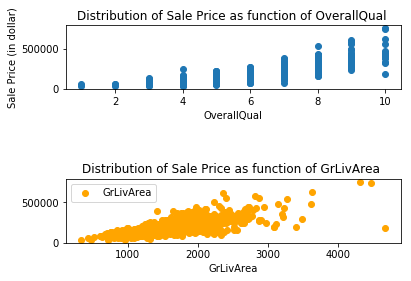

In [142]:
# Todo
# plot the SalePrices as function of your 2 variables (most correlated)
plt.subplot(3,1,1)
plt.title("Distribution of Sale Price as function of OverallQual ")
plt.xlabel("OverallQual")
plt.ylabel("Sale Price (in dollar)")
plt.scatter(OverallQual,SalePrice,label='OverallQual')

plt.subplot(3,1,3)
plt.title("Distribution of Sale Price as function of GrLivArea ")
plt.xlabel("GrLivArea")
plt.scatter(GrLivArea,SalePrice,color='orange',label='GrLivArea')
plt.legend()

# <span style="color:green; font-family:Georgia; font-size:1.5em;">4. Regression Lineaire Simple (Python) </span>


In [84]:
# Todo 

# Estimation de \beta_1

#Modèle avec OverQual
matriceCovariance1 = np.cov(OverallQual,SalePrice,ddof=0)  # matrice de covariance matrice (2,2) qui contient la variance de x, y et deux fois la covariance de xy
                                        #Ajouter ddof = 0, sinon calcul fait en fonction d'une population
print("matrice de covariance avec OverallQual = ",matriceCovariance1)
varX1 = matriceCovariance1[0,0]
covXY1 = matriceCovariance1[0,1]
print("varX avec OverallQual = ",varX1," CovXY = ",covXY1)
beta1 = covXY1 / varX1
print("beta1 avec OverallQual = ",beta1)


#Modèle avec GrLivArea
matriceCovariance2 = np.cov(GrLivArea,SalePrice,ddof=0)  # matrice de covariance matrice (2,2) qui contient la variance de x, y et deux fois la covariance de xy
                                        #Ajouter ddof = 0, sinon calcul fait en fonction d'une population
print("matrice de covariance avec GrLivArea = ",matriceCovariance2)
varX2 = matriceCovariance2[0,0]
covXY2 = matriceCovariance2[0,1]
print("varX avec GrLivArea = ",varX2," CovXY = ",covXY2)
beta1G = covXY2 / varX2
print("beta1 avec GrLivArea = ",beta1G)




matrice de covariance avec OverallQual =  [[1.91020457e+00 8.84488652e+04]
 [8.84488652e+04 6.57156021e+09]]
varX avec OverallQual =  1.910204569974561  CovXY =  88448.86519903645
beta1 avec OverallQual =  46303.34708089111
matrice de covariance avec GrLivArea =  [[2.67668947e+05 3.10512908e+07]
 [3.10512908e+07 6.57156021e+09]]
varX avec GrLivArea =  267668.94717240735  CovXY =  31051290.78589817
beta1 avec GrLivArea =  116.00632465557474


In [85]:
# Todo 
# Estimation de \beta_0
#Modèle avec OverQual
beta0 = np.mean(SalePrice) - np.mean(OverallQual)*beta1    
print("beta0 avec OverallQual = ",beta0)
#Modèle avec GrLivArea
beta0G = np.mean(SalePrice) - np.mean(GrLivArea)*beta1G    
print("beta0 avec GrLivArea = ",beta0G)


beta0 avec OverallQual =  -101320.7283788863
beta0 avec GrLivArea =  6379.2779192034795


SalePriceEstimate1 =  [ 83892.65994468  83892.65994468 222802.70118735 130196.00702557
 222802.70118735 130196.00702557 222802.70118735  83892.65994468
 176499.35410646 130196.00702557 269106.04826824 176499.35410646
 269106.04826824  83892.65994468  83892.65994468 130196.00702557
 130196.00702557 176499.35410646 269106.04826824  83892.65994468
 176499.35410646 130196.00702557 130196.00702557 176499.35410646
 130196.00702557 222802.70118735 176499.35410646 176499.35410646
 130196.00702557 315409.39534913 130196.00702557 130196.00702557
 130196.00702557  83892.65994468 130196.00702557 130196.00702557
 130196.00702557 222802.70118735 222802.70118735 176499.35410646
 269106.04826824 222802.70118735 222802.70118735 222802.70118735
 361712.74243002 269106.04826824 176499.35410646 222802.70118735
 176499.35410646 176499.35410646 130196.00702557 222802.70118735
 222802.70118735 130196.00702557 222802.70118735 222802.70118735
 176499.35410646 269106.04826824 130196.00702557 222802.70118735
 17

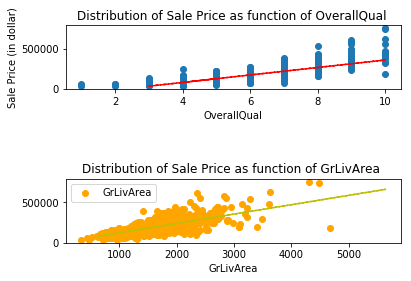

In [143]:
# prédire les valeurs sur les données de Test

#Calcul de ye avec  OverallQual
OverallQualTest = np.array(houses_test['OverallQual'].values) #Valeur de test
SalePriceEstimate1 = beta0 + OverallQualTest*beta1  # On déduit SalePrice estimé avec beta0 et beta1
print("SalePriceEstimate1 = ",SalePriceEstimate1,"\n\n")

#Calcul de ye estimée GrLivArea
GrLivAreaTest = np.array(houses_test['GrLivArea'].values) #Valeur de test
SalePriceEstimateG = beta0G + GrLivAreaTest*beta1G  # On déduit SalePrice estimé avec beta0 et beta1
print("SalePriceEstimateG = ",SalePriceEstimateG)
# Todo
# plot the SalePrices as function of your 2 variables (most correlated)
# add x label and Y label, the values and the scatter

plt.subplot(3,1,1)
plt.title("Distribution of Sale Price as function of OverallQual ")
plt.xlabel("OverallQual")
plt.ylabel("Sale Price (in dollar)")
plt.scatter(OverallQual,SalePrice,label='OverallQual')
plt.plot(OverallQualTest,SalePriceEstimate1,'--r')

plt.subplot(3,1,3)
plt.title("Distribution of Sale Price as function of GrLivArea ")
plt.xlabel("GrLivArea")
plt.scatter(GrLivArea,SalePrice,color='orange',label='GrLivArea')
plt.plot(GrLivAreaTest,SalePriceEstimateG,'--y')
plt.legend()

In [145]:
# Calculez le coeffecient de détermination R2 

#OverallQual
# coeffecient de détermination R2 
SalePriceTest = np.array(houses_test['SalePrice'].values) #Valeur de test
sCE1 = sum ( (SalePriceEstimate1 - np.mean(SalePriceTest))**2 )
sCT = sum ( (SalePriceTest - np.mean(SalePriceTest))**2 )
R2 = sCE1/sCT
print("OverallQual sCE = ",sCE1," sCT = ",sCT," R2 = ",R2)

#GrLivArea
# coeffecient de détermination R2 
sCE2 = sum ( (SalePriceEstimateG - np.mean(SalePriceTest))**2 )
sCT = sum ( (SalePriceTest - np.mean(SalePriceTest))**2 )
R2g = sCE2/sCT
print("GrLivArea sCE = ",sCE2," sCT = ",sCT," R2 = ",R2g)


OverallQual sCE =  1072025192737.4927  sCT =  1326787966920.9502  R2 =  0.807985314507577
GrLivArea sCE =  1112000540398.0176  sCT =  1326787966920.9502  R2 =  0.838114731307531


# <span style="color:green; font-family:Georgia; font-size:1.5em;">5.  Evaluation du  modèle (RMSE)
  </span>


<span style="font-family:Georgia; font-size:1.2em;">La  racine  carrée  de l’erreur quadratique moyenne (RMSE) est une   autre  mesure  des  erreurs  de  prévision. La RMSE est définie par : $ RMSE = \sqrt{ \frac{1}{n} \sum (pred - y)^{2}} $.
</span>

<span style="font-family:Georgia; font-size:1.2em;">
Cette  mesure  pénalise  d'avantage  les  erreurs  importantes 
</span>

In [148]:
# Calculez la RMSE de votre modèle sur les données de test
#OverallQual
n = SalePriceEstimate1.size 
RMSE1 = sqrt((1/n)*(sum(SalePriceEstimate1 - SalePriceTest)**2) )
print(" OverallQual RMSE = ", RMSE1)

#GrLivArea
n = SalePriceEstimate1.size 
RMSE2 = sqrt((1/n)*(sum(SalePriceEstimateG - SalePriceTest)**2) )
print(" GrLivArea RMSE = ", RMSE2)


 OverallQual RMSE =  15975.761275331875
 GrLivArea RMSE =  113999.9495809096


# <span style="color:green; font-family:Georgia; font-size:1.5em;">5.  Pour aller plus loin </span>

<span style="font-family:Georgia; font-size:1.2em;">  
La standardisation des données consiste à centrer-réduire la matrice de fonctions caractéristiques  $X$ en retranchant pour chaque vecteur $X^{j}, j \in [1, N]$ sa moyenne et en divisant par son écart-type.
</span>


<span style="font-family:Georgia; font-size:1.2em;">
La formule d’usage est alors : $ ~~~~~~~~~~~  \forall j \in [1, N] ~~~~ X^{j} = \frac{X^{j}_{std} - \mu_{j}}{ \sigma^{2}_{j}}$

</span>

In [156]:
# Todo :
##  refaire le calcul des paramètres après un prétraitement sur les données d'apprentissage

##  1.  Centrer la variable --> soustraire son espérance à chacune de ses valeurs initiales
def centrage (X):
    return X - np.mean(X)

centrageOverAllQual  = centrage(OverallQual)
centrageGrLivArea  = centrage(GrLivArea)
SalePriceCentrée = centrage(SalePrice)

##  2.  Réduire la variable --> diviser toutes ses valeurs par son écart type.
def reduction(centrage,variance):
    return (centrage/ sqrt(variance))

reduction1 = reduction(centrage1,varX1 )
reduction2 = reduction(centrage2,varX2 )
SalePriceReduit = reduction(SalePriceCentrée,1)

##    Soient  μ  l’espérance et σ l’écart-type des valeurs d’une variable aléatoire.
##    Centrer-réduire l’une de ses valeurs V revient alors à calculer : 
##          (V - μ ) / σ 
## --------------------------
##  3. re-éstimer les paramètre de modèle 
def Fbeta1(X,Y):
    matriceCovariance1 = np.cov(X,Y,ddof=0)  # matrice de covariance matrice (2,2) qui contient la variance de x, y et deux fois la covariance de xy
                                        #Ajouter ddof = 0, sinon calcul fait en fonction d'une population
    varX1 = matriceCovariance1[0,0]
    covXY1 = matriceCovariance1[0,1]
    return(covXY1 / varX1)

beta1 = Fbeta1(reduction1,SalePrice)
beta1G = Fbeta1(reduction2,SalePrice)

def Fbeta0(beta1,X,Y):
    return (np.mean(Y) - np.mean(X)*beta1)

beta0 = Fbeta0(beta1,reduction1,SalePriceReduit)
beta0G = Fbeta0(beta1,reduction2,SalePriceReduit)

##  4. re-calculer la précision du modèle sur les données de test.
def yestime(beta0,beta1,x):
    return(beta0 + x*beta1 )

def R2(ye,y):
    sCE = sum ( (ye - np.mean(y))**2 )
    sCT = sum ( (y - np.mean(y))**2 )
    return(sCE/sCT)

yEstimé1 = yestime(beta0,beta1,reduction1)
yEstimé2 = yestime(beta0G,beta1G,reduction2)

R2estimé1 = R2(yEstimé1,SalePriceReduit)
R2estimé2 = R2(yEstimé2,SalePriceReduit)

print(R2estimé1,R2estimé2)

0.6232125054457538 0.548141689924661


In [18]:
## Vos remarques !!

# <span style="color:green; font-family:Georgia; font-size:1.5em;">END</span>